In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
airline = pd.read_csv('airline_passengers.csv', index_col="Month")
airline.dropna(inplace=True)
airline.index = pd.to_datetime(airline.index)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


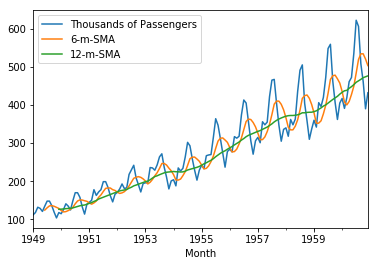

In [4]:
airline['6-m-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-m-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()
airline.plot()

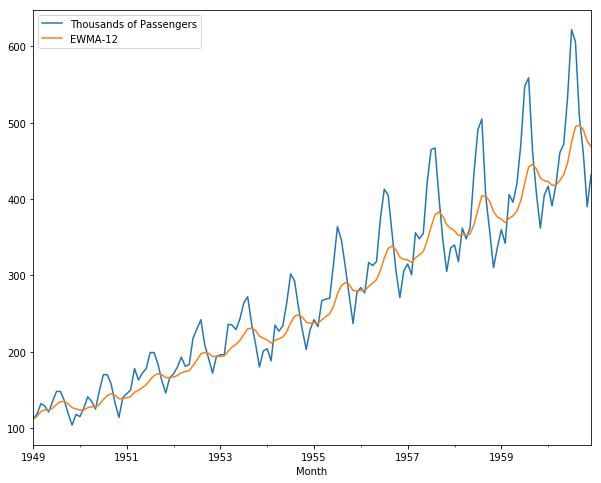

In [5]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()
airline[['Thousands of Passengers', 'EWMA-12']].plot(figsize=(10, 8))

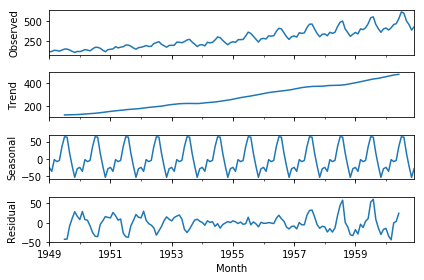

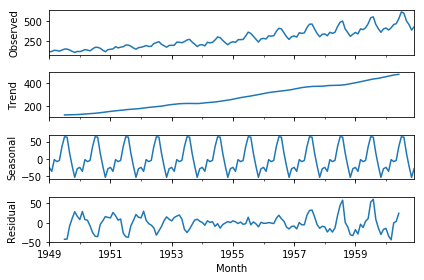

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(airline['Thousands of Passengers'], model='additive')
result.plot()